## **CORRELAÇÃO**

In [1]:
import numpy as np
import pandas as pd

In [2]:
enem_es = pd.read_csv('enem_2022_es_tratado.csv', sep=',', encoding='iso-8859-1')

In [3]:
municipiox = enem_es.loc[enem_es.NO_MUNICIPIO_ESC == 'Serra']

In [4]:
municipiox.shape

(448, 27)

In [5]:
# Lista com nota final
nota_final = ['NOTA_CN','NOTA_CH','NOTA_MT','NOTA_LC', 'NOTA_REDACAO']

In [6]:
municipiox['nota_final'] = (municipiox[nota_final].mean(axis=1))

C:\Users\eduardo.ramos\AppData\Local\Temp\ipykernel_9260\327385217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipiox['nota_final'] = (municipiox[nota_final].mean(axis=1))


In [7]:
municipiox.head()

NU_INSCRICAO FAIXA_ETARIA SEXO  ESTADO_CIVIL   RACA  NACIONALIDADE  \
53      2,10E+11           18    F             1  parda              1   
94      2,10E+11        26_30    F             0  parda              1   
106     2,10E+11           18    F             1  parda              1   
113     2,10E+11           18    M             1  preta              1   
186     2,10E+11           17    F             1  parda              1   

     TP_ST_CONCLUSAO   ESCOLA NO_MUNICIPIO_ESC NO_MUNICIPIO_PROVA  ...  \
53                 2  publica            Serra              Serra  ...   
94                 2  publica            Serra              Serra  ...   
106                2  publica            Serra              Serra  ...   
113                2  publica            Serra              Serra  ...   
186                2  publica            Serra              Serra  ...   

     TP_LINGUA  TP_STATUS_REDACAO  COMP1  COMP2  COMP3  COMP4  COMP5  \
53      ingles                1.0  160.0  200.0  140.0  120.0   80.0   
94    espanhol                1.0  120.0  120.0   60.0  100.0   80.0   
106   espanhol                1.0  100.0  180.0  140.0  120.0  160.0   
113     ingles                1.0  120.0  120.0  120.0  120.0  100.0   
186     ingles                1.0  140.0  160.0  120.0  120.0  140.0   

     NOTA_REDACAO INTERNET  nota_final  
53          700.0      sim      564.82  
94          480.0      sim      502.72  
106         700.0      nao      521.80  
113         580.0      sim      571.76  
186         680.0      sim      629.88  

[5 rows x 28 columns]

In [8]:
notas_municipiox = municipiox[['NOTA_CN','NOTA_MT','NOTA_LC','NOTA_CH','NOTA_REDACAO','nota_final']]

In [9]:
notas_municipiox

NOTA_CN  NOTA_MT  NOTA_LC  NOTA_CH  NOTA_REDACAO  nota_final
53       415.1    612.1    521.7    575.2         700.0      564.82
94       511.3    522.9    517.7    481.7         480.0      502.72
106      529.8    423.4    540.7    415.1         700.0      521.80
113      447.8    669.3    595.1    566.6         580.0      571.76
186      575.2    675.7    613.1    605.4         680.0      629.88
...        ...      ...      ...      ...           ...         ...
11712    504.7    426.8    500.7    493.9         640.0      513.22
11718    514.8    431.5    454.0    559.0           0.0      391.86
11762    523.9    689.5    611.4    585.6         720.0      626.08
11785    459.2    553.0    511.6    566.8         540.0      526.12
11813    435.9    630.6    478.6    570.3         700.0      563.08

[448 rows x 6 columns]

### Gráfico correlação

In [10]:
import seaborn as sns

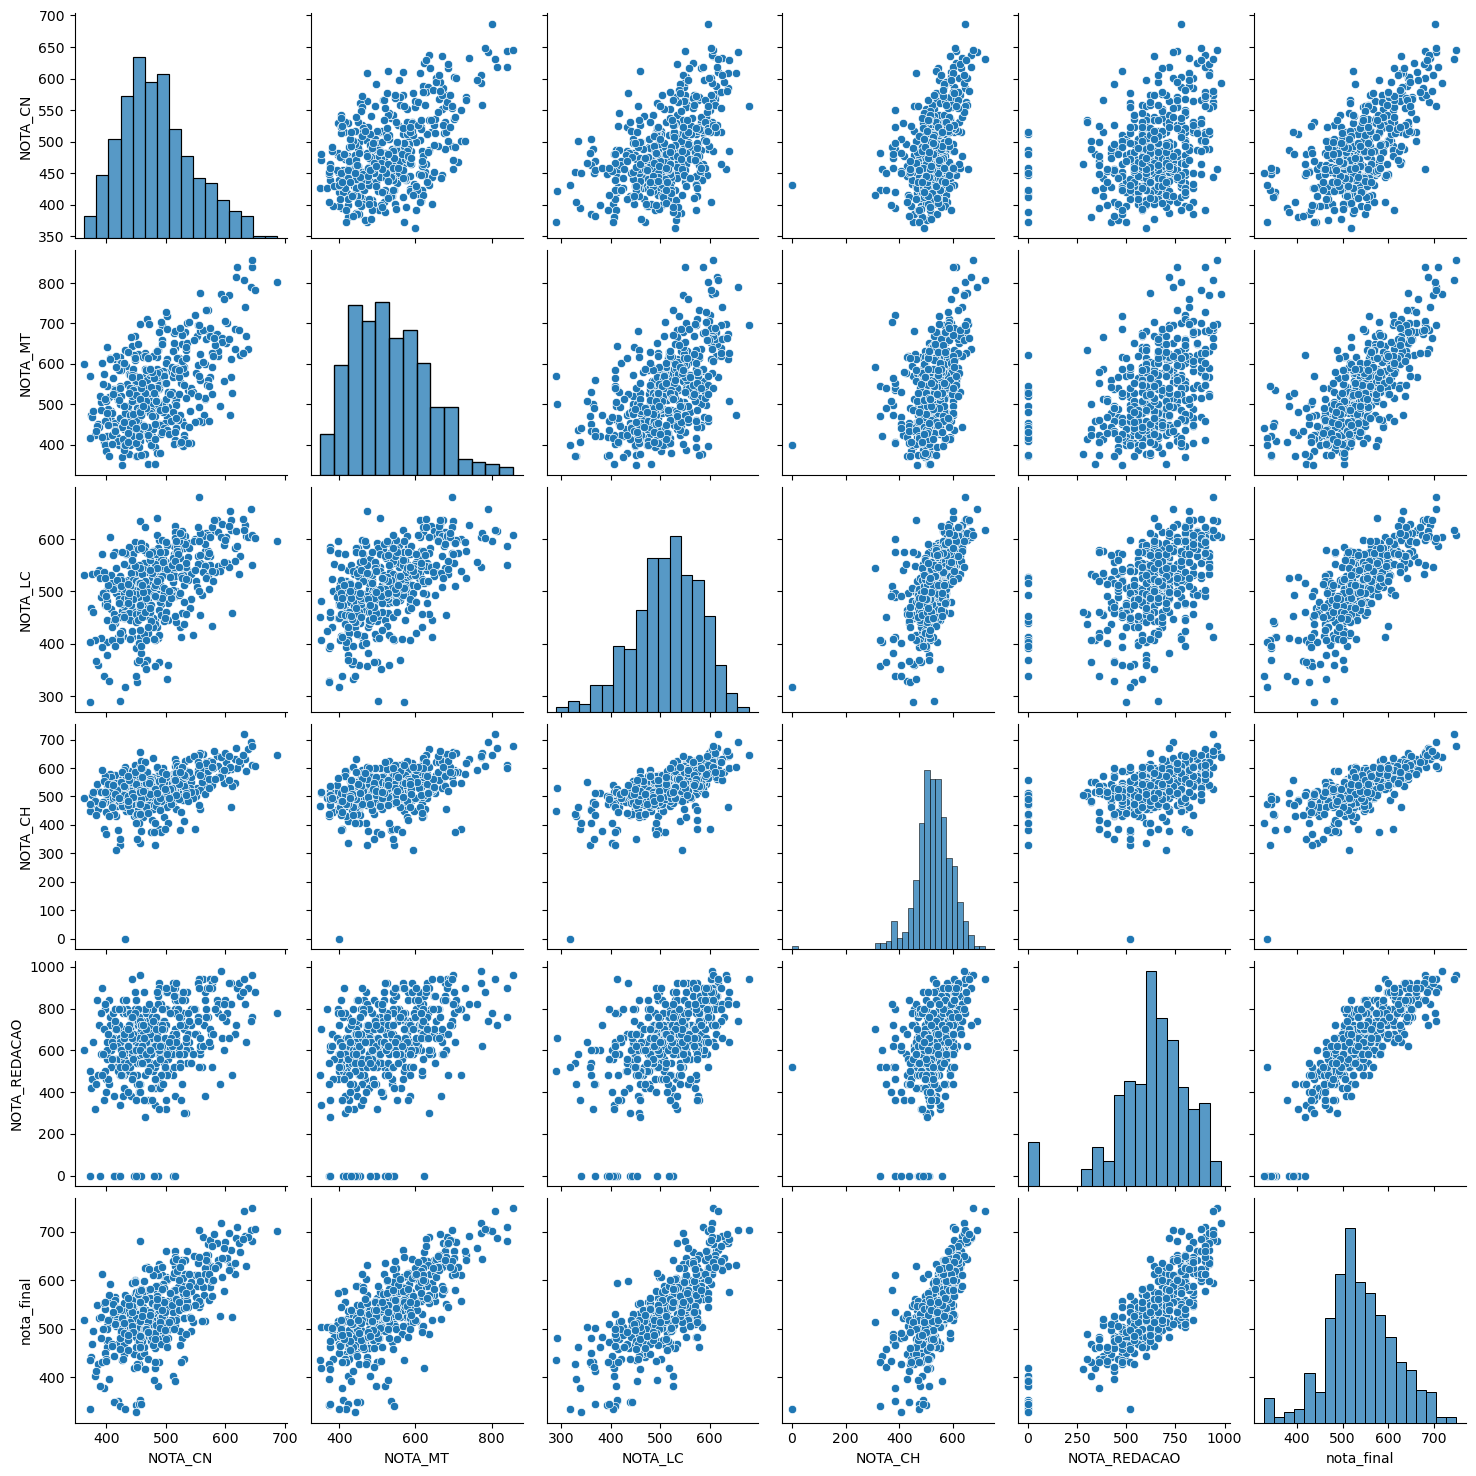

In [11]:
sns.pairplot(notas_municipiox);

In [12]:
import matplotlib.pyplot as plt

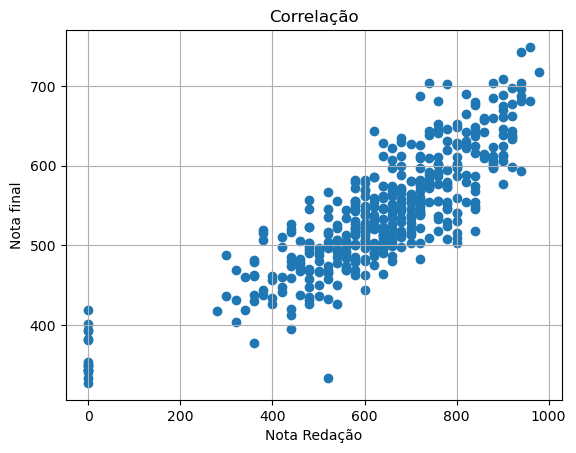

In [13]:
plt.scatter(notas_municipiox.NOTA_REDACAO,notas_municipiox.nota_final)
plt.title('Correlação')
plt.xlabel('Nota Redação')
plt.ylabel('Nota final')
plt.grid(True)
plt.show()

OBS: para escolha do método para análise da correlação (pearson, spearman ou kendall) deve ser observado a normalidade na distribuição das variáveis (testes de Shapiro-Wilk, kolmogorov-Sminorv e Anderson-Darling) 

In [14]:
correlacoes1 = notas_municipiox.corr(method='pearson')
correlacoes1

NOTA_CN   NOTA_MT   NOTA_LC   NOTA_CH  NOTA_REDACAO  nota_final
NOTA_CN       1.000000  0.525602  0.502081  0.470876      0.343719    0.653195
NOTA_MT       0.525602  1.000000  0.538248  0.473538      0.409502    0.742088
NOTA_LC       0.502081  0.538248  1.000000  0.634686      0.486978    0.768930
NOTA_CH       0.470876  0.473538  0.634686  1.000000      0.443771    0.724592
NOTA_REDACAO  0.343719  0.409502  0.486978  0.443771      1.000000    0.839835
nota_final    0.653195  0.742088  0.768930  0.724592      0.839835    1.000000

In [15]:
correlacoes2 = notas_municipiox.corr(method='spearman')
correlacoes2

NOTA_CN   NOTA_MT   NOTA_LC   NOTA_CH  NOTA_REDACAO  nota_final
NOTA_CN       1.000000  0.440990  0.494412  0.456805      0.330881    0.600946
NOTA_MT       0.440990  1.000000  0.549520  0.489773      0.420459    0.732773
NOTA_LC       0.494412  0.549520  1.000000  0.668408      0.507079    0.781737
NOTA_CH       0.456805  0.489773  0.668408  1.000000      0.496862    0.751365
NOTA_REDACAO  0.330881  0.420459  0.507079  0.496862      1.000000    0.826982
nota_final    0.600946  0.732773  0.781737  0.751365      0.826982    1.000000

In [16]:
# usa-se correlação de kendall para variáveis com até 30 amostras
correlacoes3 = notas_municipiox.corr(method='kendall')
correlacoes3

NOTA_CN   NOTA_MT   NOTA_LC   NOTA_CH  NOTA_REDACAO  nota_final
NOTA_CN       1.000000  0.303775  0.341025  0.316691      0.227773    0.429235
NOTA_MT       0.303775  1.000000  0.385362  0.345898      0.295095    0.543417
NOTA_LC       0.341025  0.385362  1.000000  0.484957      0.361048    0.589842
NOTA_CH       0.316691  0.345898  0.484957  1.000000      0.353393    0.564117
NOTA_REDACAO  0.227773  0.295095  0.361048  0.353393      1.000000    0.648970
nota_final    0.429235  0.543417  0.589842  0.564117      0.648970    1.000000

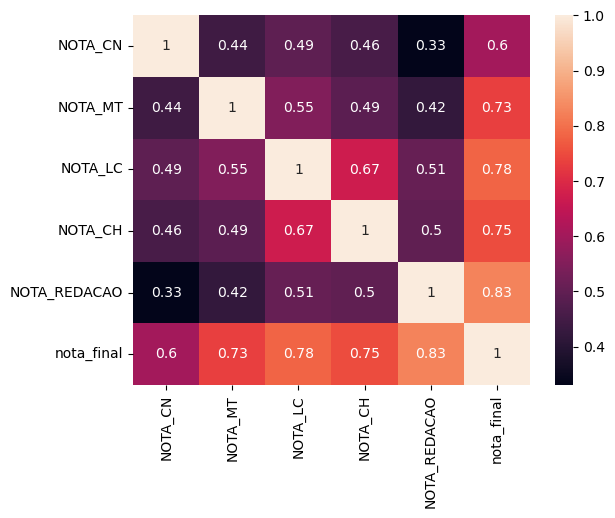

In [17]:
plt.figure()
sns.heatmap(correlacoes2, annot=True);

### Análise da Normalidade

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [18]:
import scipy.stats as stats

In [19]:
# Nota de redação
stats.shapiro(notas_municipiox.NOTA_REDACAO)
# neste caso, considerando a não normalidade é melhor usar a correlação de spearman

ShapiroResult(statistic=0.9168576002120972, pvalue=5.3222574086895114e-15)

In [20]:
# Nota final
stats.shapiro(notas_municipiox.nota_final)

ShapiroResult(statistic=0.9897359609603882, pvalue=0.0031891672406345606)

In [21]:
# Nota de Matemática
stats.shapiro(notas_municipiox.NOTA_MT)

ShapiroResult(statistic=0.9736565351486206, pvalue=3.1430357694262057e-07)

In [22]:
# Nota de Ciências da Natureza
stats.shapiro(notas_municipiox.NOTA_CN)

ShapiroResult(statistic=0.973281979560852, pvalue=2.6381221118754183e-07)

In [23]:
# Nota de Linguagem e Códigos
stats.shapiro(notas_municipiox.NOTA_LC)

ShapiroResult(statistic=0.98445725440979, pvalue=9.953749395208433e-05)

In [24]:
# Nota de Ciências Humanas
stats.shapiro(notas_municipiox.NOTA_CH)

ShapiroResult(statistic=0.9369825124740601, pvalue=7.835870624237073e-13)

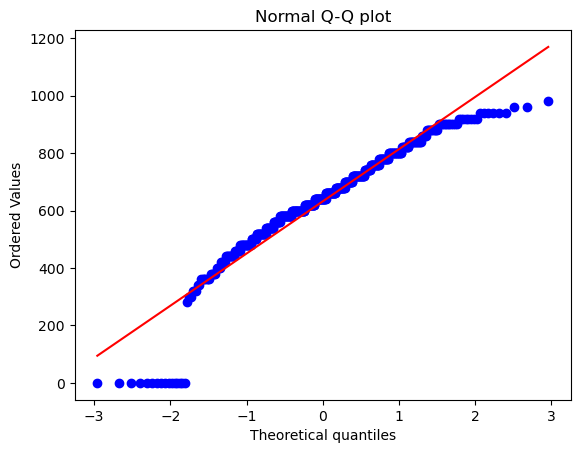

In [25]:
stats.probplot(notas_municipiox['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [26]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [27]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(municipiox.NOTA_REDACAO, dist = 'norm')

(0.10351708426963241, 0.0009999999999998899)

In [28]:
# Teste Anderson-Darling
stats.anderson(municipiox.NOTA_REDACAO, 'norm')

AndersonResult(statistic=6.26594001799964, critical_values=array([0.571, 0.65 , 0.78 , 0.91 , 1.082]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=632.0089285714286, scale=188.77559067249337)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

__________________________________________________
conclusão do teste Anderson-Darling: \
com nível de signficância de 5% (0,05) o p = 0.747
__________________________________________________
portanto, somente podemos considerar que a variável NOTA_REDACAO possui uma distribuição normal para o Município selecionado (SERRA) pelo teste Anderson-Darling

Análise dos Outliers

In [29]:
import plotly.express as px

In [30]:
grafico = px.box(notas_municipiox, y="NOTA_REDACAO")
grafico.show()

In [31]:
grafico = px.box(notas_municipiox, y="NOTA_MT")
grafico.show()

In [32]:
grafico = px.box(notas_municipiox, y="NOTA_CN")
grafico.show()

In [33]:
grafico = px.box(notas_municipiox, y="NOTA_CH")
grafico.show()

In [34]:
grafico = px.box(notas_municipiox, y="NOTA_LC")
grafico.show()

In [35]:
grafico = px.box(notas_municipiox, y="nota_final")
grafico.show()

## **REGRESSÃO**

### Regressão Linear com Statsmodels

In [36]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [37]:
regressao = smf.ols('nota_final ~ NOTA_REDACAO', data = notas_municipiox).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1068.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          2.07e-120
Time:                        10:19:19   Log-Likelihood:                -2293.8
No. Observations:                 448   AIC:                             4592.
Df Residuals:                     446   BIC:                             4600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      328.6049      6.706     48.998   

In [38]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

              Coeficientes
Intercept       328.604875
NOTA_REDACAO      0.332233


In [39]:
print("Equação da Regressão: Nota Final = {:.2f} + {:.4f}*NOTA_REDACAO".format(coefs['Coeficientes'].Intercept, \
                                                                                           coefs['Coeficientes'].NOTA_REDACAO))

Equação da Regressão: Nota Final = 328.60 + 0.3322*NOTA_REDACAO


In [40]:
notas_municipiox.head()

NOTA_CN  NOTA_MT  NOTA_LC  NOTA_CH  NOTA_REDACAO  nota_final
53     415.1    612.1    521.7    575.2         700.0      564.82
94     511.3    522.9    517.7    481.7         480.0      502.72
106    529.8    423.4    540.7    415.1         700.0      521.80
113    447.8    669.3    595.1    566.6         580.0      571.76
186    575.2    675.7    613.1    605.4         680.0      629.88

In [41]:
regressao.predict()

array([561.16788697, 488.07665454, 561.16788697, 521.29994201,
       554.52322948, 468.14268206, 494.72131204, 481.43199705,
       620.96980441, 567.81254446, 614.32514692, 594.39117444,
       501.36596953, 607.68048942, 554.52322948, 561.16788697,
       328.60487471, 594.39117444, 474.78733956, 614.32514692,
       534.589257  , 434.9193946 , 328.60487471, 534.589257  ,
       567.81254446, 561.16788697, 567.81254446, 494.72131204,
       541.23391449, 474.78733956, 554.52322948, 527.9445995 ,
       501.36596953, 547.87857198, 454.85336708, 594.39117444,
       587.74651694, 521.29994201, 541.23391449, 614.32514692,
       508.01062702, 620.96980441, 541.23391449, 547.87857198,
       534.589257  , 594.39117444, 474.78733956, 481.43199705,
       501.36596953, 594.39117444, 481.43199705, 607.68048942,
       488.07665454, 521.29994201, 488.07665454, 448.20870958,
       547.87857198, 574.45720196, 508.01062702, 541.23391449,
       581.10185945, 594.39117444, 508.01062702, 620.96

Para análise da capacidade de previsão do modelo observar o R-squared e Adj. R-squared e verificar o acerto na previsão (519.86 comparado com 541.54, por exemplo, ou seja y obervado e y previsto)

In [42]:
residuos = regressao.resid
residuos

53        3.652113
94       14.643345
106     -39.367887
113      50.460058
186      75.356771
           ...    
11712   -28.013914
11718    63.255125
11762    58.267456
11785    18.109373
11813     1.912113
Length: 448, dtype: float64

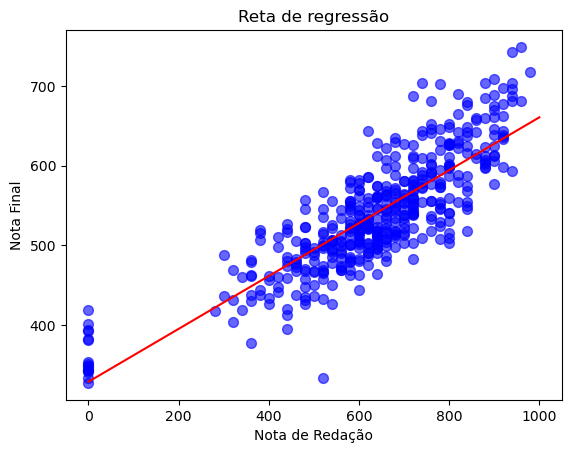

In [43]:
plt.scatter(y=notas_municipiox.nota_final, x=notas_municipiox.NOTA_REDACAO, color='blue', s=50, alpha=0.6)
#X_plot = np.linspace(min(notas_municipiox.NOTA_REDACAO), max(notas_municipiox.NOTA_REDACAO), len(notas_municipiox.NOTA_REDACAO))
X_plot = np.linspace(0, 1000)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Nota Final')
plt.xlabel('Nota de Redação')
plt.show()

### Teste de Normalidade dos resíduos

In [44]:
# Residuos da nota redação
stats.shapiro(residuos)

ShapiroResult(statistic=0.9915494322776794, pvalue=0.011828724294900894)

In [45]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(residuos, dist = 'norm')

(0.04189763743995367, 0.06900945379973834)

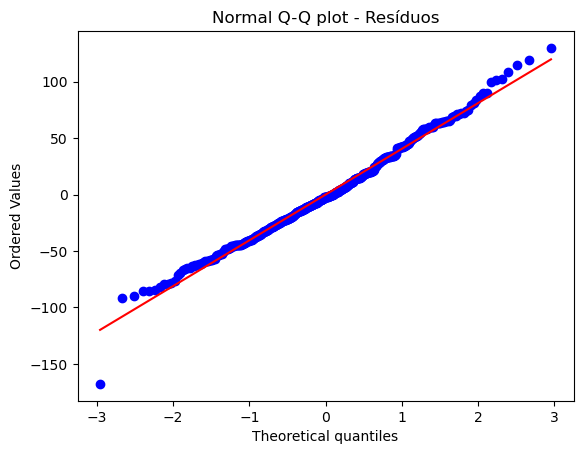

In [46]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

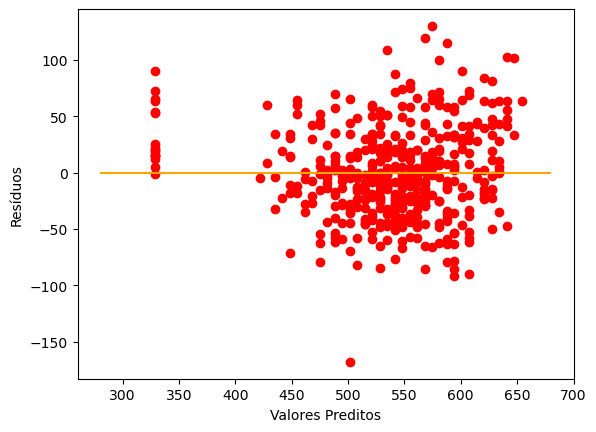

In [47]:
plt.scatter(y=residuos, x=regressao.predict(), color='red')
plt.hlines(y=0, xmin=280, xmax=680, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [48]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [49]:
estatistica, p, f, fp = sms.het_breuschpagan (regressao.resid, regressao.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 3.0366757020210997
p-valor: 0.08140245970771832
f-valor: 3.043750550089011
f_p-valor: 0.08173728125899896


### Regressão com Sklearn

In [50]:
notas_municipiox.head()

NOTA_CN  NOTA_MT  NOTA_LC  NOTA_CH  NOTA_REDACAO  nota_final
53     415.1    612.1    521.7    575.2         700.0      564.82
94     511.3    522.9    517.7    481.7         480.0      502.72
106    529.8    423.4    540.7    415.1         700.0      521.80
113    447.8    669.3    595.1    566.6         580.0      571.76
186    575.2    675.7    613.1    605.4         680.0      629.88

In [51]:
x = notas_municipiox.iloc[:, 4].values
y = notas_municipiox.iloc[:, 5].values

In [52]:
correlacao2 = np.corrcoef (x, y)
correlacao2

array([[1.        , 0.83983493],
       [0.83983493, 1.        ]])

In [53]:
x = x.reshape(-1,1) #transformando em matriz

In [54]:
from sklearn.linear_model import LinearRegression
regressao2 = LinearRegression()
regressao2.fit(x,y)

LinearRegression()

In [55]:
regressao2.intercept_

328.60487470516523

In [56]:
regressao2.coef_

array([0.33223287])

In [57]:
# coeficiente de determinação
regressao2.score(x,y)

0.7053227029221882

In [58]:
# 
previsoes = regressao2.predict(x)
previsoes

array([561.16788697, 488.07665454, 561.16788697, 521.29994201,
       554.52322948, 468.14268206, 494.72131204, 481.43199705,
       620.96980441, 567.81254446, 614.32514692, 594.39117444,
       501.36596953, 607.68048942, 554.52322948, 561.16788697,
       328.60487471, 594.39117444, 474.78733956, 614.32514692,
       534.589257  , 434.9193946 , 328.60487471, 534.589257  ,
       567.81254446, 561.16788697, 567.81254446, 494.72131204,
       541.23391449, 474.78733956, 554.52322948, 527.9445995 ,
       501.36596953, 547.87857198, 454.85336708, 594.39117444,
       587.74651694, 521.29994201, 541.23391449, 614.32514692,
       508.01062702, 620.96980441, 541.23391449, 547.87857198,
       534.589257  , 594.39117444, 474.78733956, 481.43199705,
       501.36596953, 594.39117444, 481.43199705, 607.68048942,
       488.07665454, 521.29994201, 488.07665454, 448.20870958,
       547.87857198, 574.45720196, 508.01062702, 541.23391449,
       581.10185945, 594.39117444, 508.01062702, 620.96

In [59]:
previsao = regressao2.predict([[800]])
previsao

array([594.39117444])